# Exercise Sheet 1: Quantum Logic Gates

To run this notebook you'll need to [install `qiskit`](https://docs.quantum.ibm.com/guides/install-qiskit), `qiskit-aer` and `qiskit-ibm-runtime`. This can be done in the cell below.

In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 18.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
  Attempting uninstall: cffi
    Found existing installation: cffi 1.17.1
    Uninstalling cffi-1.17.1:
      Successfully uninstalled cffi-1.17.1
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3


In [31]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

from tests1 import *

# Overview
## **Exercise 1**

See 'Part 1' below, and find and complete the circuits required for the:
* (a) `XOR` gate;
* (b) `AND` gate;
* (c) `NAND` gate;
* (d) `OR` gate.

'Part 2' below is for your own interest, where you will find a `layout` for which the AND gate compiles to 6 non-local gates for `Manila`. Note that there is some randomness in the compiling process. So you might need to try a few times. Feel free to transipile the other gates you have designed. 

## **Excercise 2** 
Answers Code showing various properties of foundational operations such as the Pauli gates/matrices and the Hadamard gate/matrix and some practice on alternative bases. 
* 1) (a)(b) Alternative Pauli Basis States
* 2) (a)(b)(c)(d) Properties of Pauli Matrices
* 3) (a)(b)(c) The Hadamard

# Exercise 1
<h2 style="font-size:24px;">Part 1: Classical logic gates with quantum circuits</h2>

<br>

<h3 style="font-size: 20px">&#128211; NOT gate (an example)</h3>

In the following function we use a quantum circuit to do the simplest job in all of computation: apply a NOT gate to a bit.

In [32]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

Now let's see it in action.

In [33]:
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

NOT with input 0 gives output 1


░ ┌───┐ ░ ┌─┐
  q: ─|0>──░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



NOT with input 1 gives output 0


┌───┐ ░ ┌───┐ ░ ┌─┐
  q: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

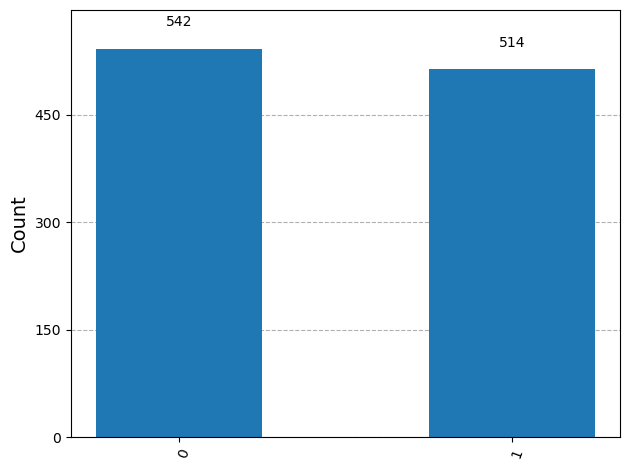

In [34]:
qc = QuantumCircuit(2,1)
qc.h(0)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.draw()

backend = AerSimulator()
job = backend.run(qc, shots = 1056)
output = job.result()
counts = output.get_counts()
plot_histogram(counts)

This implementation of NOT gate was an example of what you will need to do for a range of other gates below.

<h3 style="font-size: 20px">&#128211;(a) XOR gate </h3>

Takes two binary strings as input and gives one as output.

The output is '0' when the inputs are equal and  '1' otherwise.

In [35]:
### BEGIN SOLUTION
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    qc.cx(0,1)
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = AerSimulator()
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output
### END SOLUTION

In [36]:
XOR('0','0')[1]


'0'

In [37]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

test_xor(XOR)  # DO NOT EDIT THIS LINE

XOR with inputs 0 0 gives output 0


░       ░    
q_0: ─|0>──░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>──░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



XOR with inputs 0 1 gives output 1


░       ░    
q_0: ─|0>───────░───■───░────
          ┌───┐ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



XOR with inputs 1 0 gives output 1


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>───────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



XOR with inputs 1 1 gives output 0


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          ├───┤ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



✅ All XOR gate tests passed.


<h3 style="font-size: 20px">&#128211; (b) AND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'1'` only when both the inputs are `'1'`.

In [38]:
### BEGIN SOLUTION

def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    qc.ccx(0,1,2)
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output
    # Test AND gate outputs using assert statements
### END SOLUTION

In [39]:
AND('0','0')[1]

'0'

In [40]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

test_and(AND) # DO NOT EDIT THIS LINE

AND with inputs 0 0 gives output 0


░       ░    
q_0: ─|0>──░───■───░────
           ░   │   ░    
q_1: ─|0>──░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



AND with inputs 0 1 gives output 0


░       ░    
q_0: ─|0>───────░───■───░────
          ┌───┐ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 1 0 gives output 0


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          └───┘ ░   │   ░    
q_1: ─|0>───────░───■───░────
                ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 1 1 gives output 1


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          ├───┤ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



✅ All AND gate tests passed.


<h3 style="font-size: 20px">&#128211; NAND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'0'` only when both the inputs are `'1'`.

In [41]:
### BEGIN SOLUTION
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    qc.ccx(0, 1, 2)
    qc.x(2)
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output
    # Test NAND gate outputs using assert statements
### END SOLUTION

In [42]:
NAND('1','0')[1]

'1'

In [43]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

test_nand(NAND) # DO NOT EDIT THIS LINE

NAND with inputs 0 0 gives output 1


░            ░    
q_0: ─|0>──░───■────────░────
           ░   │        ░    
q_1: ─|0>──░───■────────░────
           ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>──░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



NAND with inputs 0 1 gives output 1


░            ░    
q_0: ─|0>───────░───■────────░────
          ┌───┐ ░   │        ░    
q_1: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



NAND with inputs 1 0 gives output 1


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░   │        ░    
q_1: ─|0>───────░───■────────░────
                ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



NAND with inputs 1 1 gives output 0


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          ├───┤ ░   │        ░    
q_1: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



✅ All NAND gate tests passed.


<h3 style="font-size: 20px">&#128211; OR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '1' if either input is '1'.

In [44]:
### BEGIN SOLUTION
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes
    
    qc.x(0)
    qc.x(1)
    qc.ccx(0,1,2)
    qc.x(2) 
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output
### END SOLUTION

In [45]:
OR('1','0')[0].draw()

┌───┐ ░ ┌───┐           ░    
q_0: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ ├───┤  │        ░    
q_1: ─|0>───────░─┤ X ├──■────────░────
                ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0

In [46]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

test_or(OR) # DO NOT EDIT THIS LINE

OR with inputs 0 0 gives output 0


░ ┌───┐           ░    
q_0: ─|0>──░─┤ X ├──■────────░────
           ░ ├───┤  │        ░    
q_1: ─|0>──░─┤ X ├──■────────░────
           ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>──░──────┤ X ├┤ X ├─░─┤M├
           ░      └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



OR with inputs 0 1 gives output 1


░ ┌───┐           ░    
q_0: ─|0>───────░─┤ X ├──■────────░────
          ┌───┐ ░ ├───┤  │        ░    
q_1: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



OR with inputs 1 0 gives output 1


┌───┐ ░ ┌───┐           ░    
q_0: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ ├───┤  │        ░    
q_1: ─|0>───────░─┤ X ├──■────────░────
                ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



OR with inputs 1 1 gives output 1


┌───┐ ░ ┌───┐           ░    
q_0: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          ├───┤ ░ ├───┤  │        ░    
q_1: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



✅ All OR gate tests passed.


<h2 style="font-size:24px;">Part 2: AND gate on Quantum Computer</h2>
<br>

Real quantum computers are not able to implement arbitary gates directly. Instead, everything needs to be compiled  (or 'transpiled') to the set of basic gates that the device can use. This usually consists of a set of single qubit rotations, as well as two qubit gates like `cx`.

There are also limits on which `cx` gates can be used directly: only some pairs of control and target qubits are possible. To implement other `cx` gates, tricks such as using `swap` gates to effectively move information around must be used. The possible pairs of qubits on which `cx` gates can be applied is known as the 'connectivity' of the device.

We'll now look at some examples. To make sure you don't end up in a queue for a busy device, we'll be using mock backends. These are designed to act exactly like real backends.

In [47]:
from qiskit_ibm_runtime.fake_provider import FakeYorktownV2
backend = FakeYorktownV2()

The system we are using (or at least pretending to) is `Manila`. With this system, it is not possible to peform a `cx` gate between any arbitrary pair of qubits. Instead only the following pairings are allowed (where the qubits are labelled from 0 to 4).

In [48]:
backend.configuration().coupling_map

[[0, 1],
 [0, 2],
 [1, 0],
 [1, 2],
 [2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [3, 2],
 [3, 4],
 [4, 2],
 [4, 3]]


The following cell has a circuit that applies an `AND` gate that is constructed from single and two qubit gates. However, this circuit assumes full connectivity: that `cx` gates can be applied between any pair of qubits.

In [49]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate for hardware with the required connectiviy')
qc_and.decompose().draw()

AND gate


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘



Transpiled AND gate for hardware with the required connectiviy


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

This ideal transpilation requires 6 `cx` gates.

There are often optimizations that the transpiler can perform that reduce the overall gate count, and thus total length of the input circuits.  Note that the addition of swaps to match the device topology, and optimizations for reducing the length of a circuit are at odds with each other. In what follows we will make use of `initial_layout` that allows us to pick the qubits on a device used for the computation and `optimization_level`, an argument that allows selecting from internal defaults for circuit swap mapping and optimization methods to perform.

Rather than actually running the AND function, let's just look at the transpiled circuits. The following function does this for a given set of inputs.

In [50]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    
    return qc_trans

<p>&#128211; Assign your choice of layout to the list variable <code>layout</code> in the cell below</p>

In [63]:
# Assign your choice of the initial_layout to the variable layout1 as a list 
# For example
#     layout = [0,2,4]
layout = [0,1,2]

Compile the `AND` gate on `Manila` by running the cell below.

In [64]:
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans1 = AND(input1, input2, backend, layout)
                
        print('For input '+input1+input2)
        print('# of nonlocal gates =',qc_trans1.num_nonlocal_gates())

test_compilation(layout) # DO NOT EDIT THIS LINE

For input 00
# of nonlocal gates = 6
For input 01
# of nonlocal gates = 6
For input 10
# of nonlocal gates = 6
For input 11
# of nonlocal gates = 6
For input 00
For input 01
For input 10
For input 11
✅ Ideal transpilation acheived.


# Excercise 2
## 1. Alternative Pauli Basis States

There are an infinite number of possible single qubit states.  From a theoretical stand-point,  the  one  we  choose  to  label $| 0 \rangle$ is  arbitrary.   So  let’s  consider  the  following alternative.

$$
| \bar 0 \rangle = \cos(\theta) \, | 0 \rangle + \sin(\theta) \, | 1 \rangle.
$$

For this $| \bar 0 \rangle$:

(a) Find a corresponding orthogonal state $| \bar 1 \rangle$;

(b)  For this basis $| \bar 0 \rangle$, $| \bar 1 \rangle$, find mutually unbiased basis states $| \bar + \rangle$ and $| \bar - \rangle$;



### Instructions

**Representing States**: Qubit states will be represented as NumPy arrays of shape (2, 1). For example, ket_0 = np.array([[1], [0]]).

**Completing the Functions**: Your task is to complete the three Python functions provided in the code block below:

`find_orthogonal_state(ket_zero_bar, theta)`

`find_mutually_unbiased_basis_plus(ket_zero_bar, ket_one_bar)`

`find_mutually_unbiased_basis_minus(ket_zero_bar, ket_one_bar)`

**Running the Tests**: After implementing the functions, run the entire script. The assert statements will automatically check if your implementations are correct. If all tests pass, you will see the message "All tests passed!". Otherwise, an AssertionError will be raised, indicating a problem with your implementation.


In [117]:
ket_0 = np.array([[1], [0]], dtype=complex)
ket_1 = np.array([[0], [1]], dtype=complex)

### BEGIN SOLUTION
def find_orthogonal_state(ket_zero_bar, theta):
    """
    Calculates the orthogonal state |ψ1⟩ for a given |ψ0⟩.

    Args:
        ket_zero_bar: A NumPy array representing the state |ψ0⟩.
        theta: The angle theta in radians.

    Returns:
        A NumPy array representing the orthogonal state |ψ1⟩.
    """
    # --- YOUR CODE HERE ---
    # Hint: An orthogonal state can be found by swapping the amplitudes
    # of the original state and changing the sign of one of them.
    # For |ψ0⟩ = a|0⟩ + b|1⟩, an orthogonal state is |ψ1⟩ = b|0⟩ - a|1⟩.
    # Another valid orthogonal state is |ψ1⟩ = -b|0⟩ + a|1⟩.

    state = -np.sin(theta)*ket_0 + np.cos(theta)*ket_1
    return state # Replace this with your implementation

def find_mutually_unbiased_basis_plus(ket_zero_bar, ket_one_bar):
    """
    Calculates the |ψ+⟩ state for the mutually unbiased basis.

    Args:
        ket_zero_bar: A NumPy array representing the state |ψ0⟩.
        ket_one_bar: A NumPy array representing the state |ψ1⟩.

    Returns:
        A NumPy array representing the |ψ+⟩ state.
    """
    # --- YOUR CODE HERE ---
    # Hint: The |+⟩ state in the standard basis is (|0⟩ + |1⟩) / sqrt(2).
    # In a new basis, it will be a superposition of the new basis vectors.
    state = 1/np.sqrt(2)*(ket_zero_bar + ket_one_bar)
    return  state # Replace this with your implementation

def find_mutually_unbiased_basis_minus(ket_zero_bar, ket_one_bar):
    """
    Calculates the |ψ-⟩ state for the mutually unbiased basis.

    Args:
        ket_zero_bar: A NumPy array representing the state |ψ0⟩.
        ket_one_bar: A NumPy array representing the state |ψ1⟩.

    Returns:
        A NumPy array representing the |ψ-⟩ state.
    """
    # --- YOUR CODE HERE ---
    # Hint: The |-⟩ state in the standard basis is (|0⟩ - |1⟩) / sqrt(2).
    # In a new basis, it will also be a superposition of the new basis vectors.
    state = 1/np.sqrt(2)*(ket_zero_bar - ket_one_bar)
    return  state # Replace this with your implementation
### END SOLTUION

In [118]:
# Test your solutions
test_alt(find_orthogonal_state,find_mutually_unbiased_basis_plus,find_mutually_unbiased_basis_minus) # DO NOT EDIT THIS LINE

✅ Test (a) passed: |ψ0⟩ and |ψ1⟩ are orthogonal.
✅ Test (b) passed: The bases are mutually unbiased.

Congratulations! All tests passed!


## 2. Properties of the Pauli Matrices

Note: Sometimes the Pauli matrices are written as $X$, $Y$ and $Z$, and sometimes as $\sigma_x$, $\sigma_y$ and $\sigma_z$. For  the  most  part,  the  convention  is  an  arbitrary  choice. Once  you’ve used them enough,  you’ll hardly notice the difference (to the great annoyance of your students!).

The Pauli matrices are defined

$$
X = 
\begin{pmatrix} 
0 & 1 \\
1 & 0 \\
\end{pmatrix}, \,\,
Y = 
\begin{pmatrix} 
0 & -i \\
i & 0 \\
\end{pmatrix}, \,\,
Z = 
\begin{pmatrix} 
1 & 0 \\
0 & -1 \\
\end{pmatrix}, \,\,
$$

(a) Show that each squares to the identity matrix.

$$
I = 
\begin{pmatrix} 
1 & 0 \\
0 & 1 \\
\end{pmatrix}
$$

(b) Show that $P_1 P_2 = - P_2 P_1$ for any pair of Paulis $P_1$ and $P_2$.

(c) Show that $P_1 P_2 \sim P_3$ for any pair of Paulis $P_1$ and $P_2$, where $P_3$ is the remaining Pauli.

(d) Find the eigenvectors and eigenvalues of each Pauli.

### Instructions 

**Define the Matrices**: In Part 1, define the Pauli matrices X, Y, Z, and the identity matrix I using NumPy.

**Implement the Test Functions**: In Part 2, complete the function skeletons provided. Each function is designed to test a specific property of the Pauli matrices and should return a value (usually a boolean) indicating the result of the test. Read the docstrings and hints carefully to understand what each function needs to do.

**Sumbit**: After completing your implementation, run the entire script. The code in the test section will call your functions and use assert statements to check if they produce the correct results. If all your functions work as expected, you will see a series of "PASS" messages.

In [127]:
### BEGIN SOLUTION
# --- Part 1: Define the Matrices ---
# Define the Pauli matrices and the Identity matrix as NumPy arrays.
# Use dtype=complex for matrices with complex entries.

X = np.array([[0,1],[1,0]])  # Replace None with the definition of the X matrix
Y = np.array([[0,-1.j],[1.j,0]])  # Replace None with the definition of the Y matrix
Z = np.array([[1,0],[0,-1]])  # Replace None with the definition of the Z matrix
I = np.array([[1,0],[0,1]])  # Replace None with the definition of the Identity matrix

# This dictionary is used by the test functions.
paulis = {'X': X, 'Y': Y, 'Z': Z}

# --- Part 2: Implement the Test Functions ---
# Complete the following functions to test the properties of the Pauli matrices.

def test_square_to_identity(P):
    """
    (a) Check if each Pauli matrix squares to the identity matrix.

    Returns:
        np.array: matrix of your results 
    """
    # Hint: 
    # calculate P @ P
    return P@P  # Your implementation here

def test_anticommutation(P1, P2):
    """
    (b) Check if P1 @ P2 = -P2 @ P1 for any pair of distinct Paulis.

    Returns:
        [np.array1,np.array2]: list of the left and right side of the equation for one pair
    """
    # Hint: You can check the pairs (X, Y), (Y, Z), and (Z, X).
    # For each pair (P1, P2), check if P1 @ P2 is close to -(P2 @ P1).
    return [P1@P2,-P2@P1]  # Your implementation here

def test_product_relation():
    """
    (c) Check if the Pauli product relations hold (XY=iZ, YZ=iX, ZX=iY).

    Returns:
        list[np.array]: The 3 matrices resulting from your calculations in the order above
    """
    # Hint: Check each of the three relations separately. For example,
    # check if np.allclose(X @ Y, 1j * Z).
    # All three must be correct for the function to pass.
    return [X@Y, Y@Z, Z@X]  # Your implementation here

def get_eigenvalues_and_eigenvectors():
    """
    (d) Calculate the eigenvalues and eigenvectors for each Pauli matrix.

    Returns:
        tuple: A tuple containing two dictionaries:
               (eigenvalues_dict, eigenvectors_dict)

               - eigenvalues_dict: A dictionary where keys are the names
                 ('X', 'Y', 'Z') and values are the corresponding eigenvalues.
               - eigenvectors_dict: A dictionary where keys are the names
                 and values are the corresponding eigenvectors.
    """
    # Hint: Use a loop and np.linalg.eig() for each Pauli matrix. This
    # function returns a tuple of (eigenvalues, eigenvectors). Store these
    # in the two dictionaries with the correct keys ('X', 'Y', 'Z').
    eigenvalues_dict = {}
    eigenvectors_dict = {}

    for key, value in paulis.items():
        eigenvalues, eigenvectors = np.linalg.eig(value)
        eigenvalues_dict[key] = eigenvalues
        eigenvectors_dict[key] = eigenvectors

    return eigenvalues_dict, eigenvectors_dict

### END SOLUTION


In [128]:
# Test your solutions
test_paulis(I,X,Y,Z,test_square_to_identity,test_anticommutation,test_product_relation,get_eigenvalues_and_eigenvectors) # DO NOT EDIT THIS LINE

✅ PASS (a): Your function `test_square_to_identity` works correctly.
✅ PASS (b): Your function `test_anticommutation` works correctly.
✅ PASS (c): Your function `test_product_relation` works correctly.
✅ PASS (d): Your function `get_eigenvalues_and_eigenvectors` has the correct return type and keys.
✅ PASS (d): Eigenvalues and eigenvectors are correct for all Pauli matrices.

Congratulations! All tests passed!



## 3. The Hadamard

The Hadamard matrix can be expressed

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix} 
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

(a) Find the eigenvectors and eigenvalues of this matrix.

(b) Show that $H$ also squares to identity.

(c) Show that $H P_1 H^\dagger \sim P_2$ for Paulis $P_1$ and $P_2$. 

### Instructions:

**Define the Matrices**: In Part 1, define the Hadamard matrix H using NumPy.

**Implement the Functions**: In Part 2, complete the function skeletons. Each function is designed to test a specific property of the Hadamard matrix and should return a value that reflects the outcome of the test.

Run the Grading: Once you have completed your implementation, run the entire script. The code in the grader will call your functions and use assert statements to check if they are correct.


In [142]:
### BEGIN SOLUTION
# --- Part 1: Define the Matrices ---
# Define the Hadamard and Identity matrices as NumPy arrays.

H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])  # Replace None with the definition of the Hadamard matrix

# --- Part 2: Implement the Test Functions ---
# Complete the following functions to test the properties of the Hadamard matrix.

def get_hadamard_eigen_system():
    """
    (a) Find the eigenvectors and eigenvalues of the Hadamard matrix.

    Returns:
        tuple: A tuple of (eigenvalues, eigenvectors)
    """
    return np.linalg.eig(H)

def test_hadamard_squares_to_identity():
    """
    (b) Show that H squares to the identity matrix.

    Returns:
        np.array: Result of the calculation asked for
    """
    return H@H

def test_hadamard_pauli_transformation():
    """
    (c) Show that conjugating a Pauli with H results in another Pauli.
        Specifically, verify:
        1. H X H† =?
        2. H Y H† = ?
        3. H Z H† =?
    Returns:
        [str1,str2,str3]: strings must be a X Y Z or I and must be written as
                          iP, -P, -iP or P, where P is the correct Pauli. 
    """
    return ['Z', '-Y','X']
### END SOLTUION

In [143]:
# Test your solutions
test_hadamard(H,get_hadamard_eigen_system,test_hadamard_squares_to_identity,test_hadamard_pauli_transformation) # DO NOT EDIT THIS LINE

--- Running Verification ---
✅ PASS (a): Your function `get_hadamard_eigen_system` works correctly.
✅ PASS (b): Your function `test_hadamard_squares_to_identity` works correctly.
✅ PASS (c): Your answers are correct.

Congratulations! All tests passed!
